描述关系：观察、拟合、插值

极小化绝对偏差（纵向偏差）之和
Chebyshev近似准则：极小化$Max|y_i-y(x_i)|$ also known as the minimax criterion
最小二乘准则：极小化偏差平方和


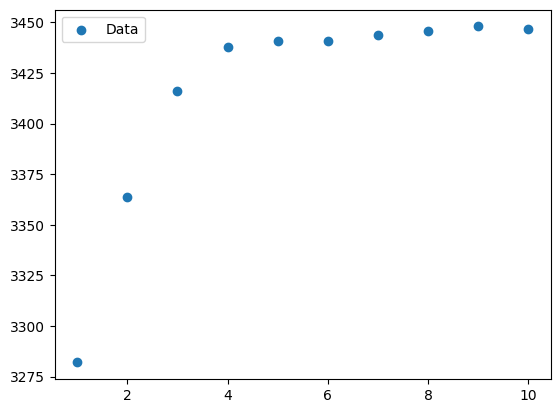

In [11]:
# fitness
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 弹簧弹性数据
# x_data = np.array([5,10,20,30,40,50,60,70,80,90])
# y_data = np.array([0,19,57,94,134,173,216,256,297,343])
#
# def func(x, a):
#     return a * x
x_data = np.arange(1,11,1)
y_data = np.array([3282,3364,3416,3438,3441,3441,3444,3446,3448,3447])
plt.scatter(x_data, y_data, label='Data')
plt.legend()
plt.show()

[2.90386941e-04 4.05522365e-05]


Text(0.5, 1.0, 'Linear Fit')

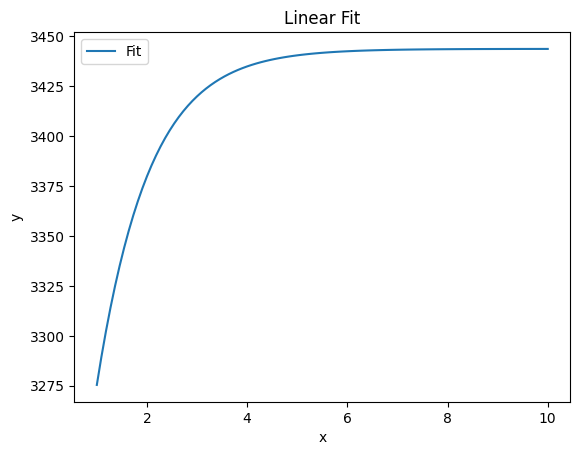

In [15]:
def func(x, a, b):
    return 1/(a+b*np.exp(-x))

# Perform the curve fitting
params, _ = curve_fit(func, x_data, y_data)

print(params)

# Extract the fitted parameters
a_fit, b_fit = params

# Generate the fitted curve
x_fit = np.linspace(x_data.min(), x_data.max(), 100)
y_fit = func(x_fit, a_fit, b_fit)

# Plot the original data and the fitted curve

plt.plot(x_fit, y_fit, label='Fit')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Fit')

# 插值多项式
插值结点($x_0, x_1, \cdots, x_n$) 插值条件（$\Phi(x_i) \equals f(x_i)$，也可包含若干阶导数条件），则$\Phi(x) \approx f(x)$
在n+1个相异点上确定一个不超过n次的多项式，若插值条件只包含0阶导数，此时系数矩阵的行列式是范德蒙行列式，也就是相异点保证了行列式值不为0，故n次插值多项式的有解是唯一的。若$f(x)$在$[a, b]$上充分光滑，余项为$R_n(x)=f(x)-p_n(x)=\frac{f^{(n+1)}(\xi)}{(n+1)!}\prod^n_{i=0}(x=x_i), \xi \in (a,b)$。但解方程组的方法在n较大时不现实，故有以下其它方法。
拉格朗日插值：构造一组$n+1$个基函数：$l_i(x)=\prod_{j=0,j\neq i}^{n} \frac{x-x_j}{x_i-x_j} (i=0,1,\cdots,n)$，故结果为$L_n(x)=\sum_{i=0}^{n}y_i l_i (x)$，"由Rolle定理插值多项式的余项可推出"？可用于估计误差限。与带拉格朗日余项的泰勒多项式均属于多次多项式插值的特例，泰勒多项式使用一个点处m次导数插值，拉格朗日插值使用n+1个互异点处各0次导数插值。
牛顿插值：一阶差商$f[x_i,x_j]=\frac{f(x_i)-f(x_j)}{x_i-x_j}$，n阶差商$f[x_0,x_1, \cdots , x_n]=\frac{f[x_0,x_1, \cdots, x_{n-1}]-f[x_1, x_2, \cdots, x_n]}{x_0-x_n}$，差商具有可加性与对称性。$N_n(x)=f(x_0)+(x-x_0)f[x_0,x_1]+\cdots+(x-x_0)(x-x_1)\cdots(x-x_{n-1})f[x_0,x_1,\cdots,x_n]$，便于递归计算，计算量小于Lagrange插值。
Hermite插值
Runge现象，n增大时只在一部分收敛与被插函数$f(x)$，其余部分震荡剧烈。
分段线性插值：$\lim_{n \rightarrow \infty}I_n(x)=f(x)$，光滑性差
三次样条插值：历史上用弹性样条拟合，力学理论证明这种方式不超3次

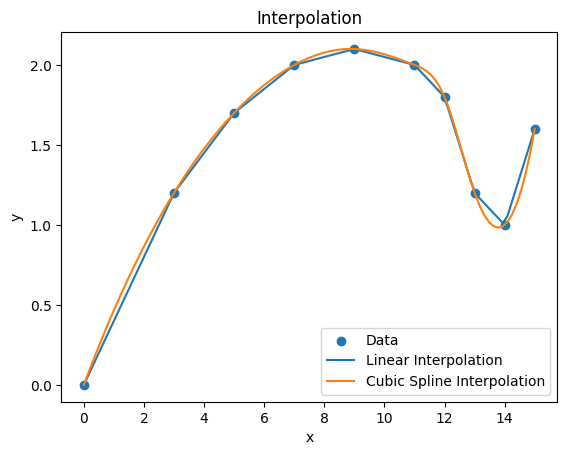

In [17]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Sample data
x_data = np.array([0,3,5,7,9,11,12,13,14,15])
y_data = np.array([0,1.2,1.7,2.0,2.1,2.0,1.8,1.2,1.0,1.6])

# Linear interpolation
# kind='linear' 'nearest' 'zero' 'slinear' 'quadratic' 'cubic'
linear_interp = interp1d(x_data, y_data, kind='linear')

# Cubic spline interpolation
cubic_interp = interp1d(x_data, y_data, kind='cubic') #三次

# Generate additional points for interpolation
x_interp = np.linspace(x_data.min(), x_data.max(), 100)

# Perform interpolation
y_linear = linear_interp(x_interp)
y_cubic = cubic_interp(x_interp)

# Plot original data and interpolated curves
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_interp, y_linear, label='Linear Interpolation')
plt.plot(x_interp, y_cubic, label='Cubic Spline Interpolation')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolation')
plt.show()

In [8]:
def lagrange_interpolation(x, y, x_interp):
    """
    Performs Lagrange interpolation to approximate the y values for given x_interp values.

    Arguments:
    x -- array-like, known x values
    y -- array-like, known y values
    x_interp -- array-like, x values to interpolate

    Returns:
    y_interp -- array, interpolated y values
    """
    n = len(x)
    m = len(x_interp)
    y_interp = np.zeros(m)

    for i in range(m):
        for j in range(n):
            l = 1.0
            for k in range(n):
                if k != j:
                    l *= (x_interp[i] - x[k]) / (x[j] - x[k])
            y_interp[i] += y[j] * l

    return y_interp

# Example usage
x_data = np.array([1, 1.728, 2.744])
y_data = x_data**(1/3)
x_interp = [2]

y_interp = lagrange_interpolation(x_data, y_data, x_interp)
print(y_interp)

[1.26257965]


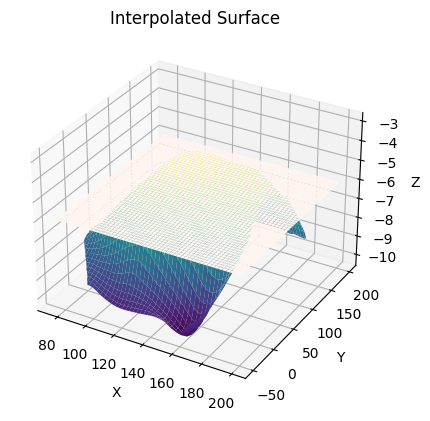

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# Input data points
x_data = np.array([129, 140, 103.5, 88, 185.5, 195, 105, 157.5, 107.5, 77, 81, 162, 162, 117.5])
y_data = np.array([7.5, 141.5, 23, 147, 22.5, 137.5, 85.5, -6.5, -81, 3, 56.5, -66.5, 84, -33.5])
z_data = -np.array([4, 8, 6, 8, 6, 8, 8, 9, 9, 8, 8, 9, 4, 9])

# Create a grid of points for interpolation
xi = np.linspace(75, 200, 200)
yi = np.linspace(-50, 200, 200)
xi, yi = np.meshgrid(xi, yi)

# Perform two-dimensional interpolation using the griddata function
# interpolate unstructured D-D data.
zi = griddata((x_data, y_data), z_data, (xi, yi), method='cubic')

# Create a three-dimensional plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the interpolated surface
ax.plot_surface(xi, yi, zi, cmap='viridis')
dangerous = -5*np.ones_like(zi)
ax.plot_surface(xi, yi, dangerous, cmap='Reds')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Interpolated Surface')

# Display the plot
plt.show()

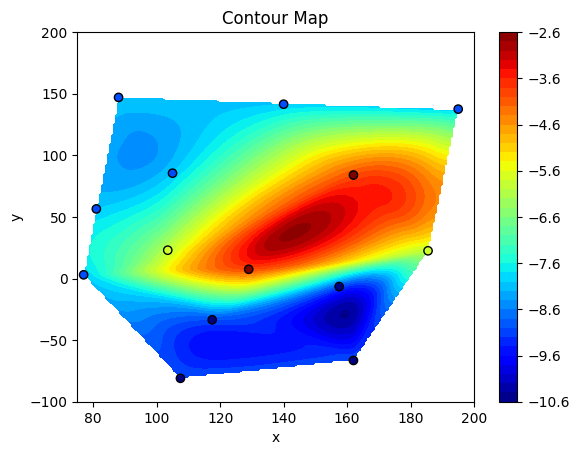

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# Input data points
x_data = np.array([129, 140, 103.5, 88, 185.5, 195, 105, 157.5, 107.5, 77, 81, 162, 162, 117.5])
y_data = np.array([7.5, 141.5, 23, 147, 22.5, 137.5, 85.5, -6.5, -81, 3, 56.5, -66.5, 84, -33.5])
z_data = -np.array([4, 8, 6, 8, 6, 8, 8, 9, 9, 8, 8, 9, 4, 9])

# Create a grid of points for interpolation
xi = np.linspace(75, 200, 200)
yi = np.linspace(-100, 200, 200)
xi, yi = np.meshgrid(xi, yi)

# Perform two-dimensional interpolation using the griddata function
# interpolate unstructured D-D data.
zi = griddata((x_data, y_data), z_data, (xi, yi), method='cubic')

# Create a three-dimensional plot
fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

plt.contourf(xi, yi, zi, levels=40, cmap='jet')
plt.colorbar()  # Add colorbar
plt.scatter(x_data, y_data, c=z_data, cmap='jet', edgecolors='k')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Map')
# Display the plot
plt.show()

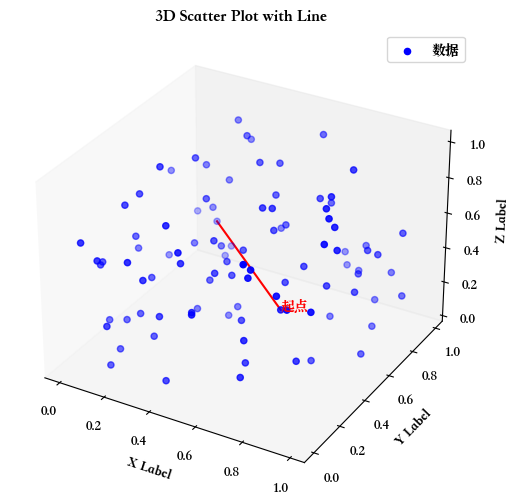

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Replace the path with the actual path of the Chinese font file on your system
chinese_font_path = '/System/Library/Fonts/Supplemental/Songti.ttc'

# Load the Chinese font
prop = fm.FontProperties(fname=chinese_font_path)

# Configure Matplotlib to use the Chinese font for displaying text
plt.rcParams['font.family'] = prop.get_name()

# Sample data for demonstration purposes
# Replace these with your own data or load data from a file
x = np.random.rand(100)
y = np.random.rand(100)
z = np.random.rand(100)

# Sample two points to connect with a line
index_start = 0
index_stop = 1
point1 = [x[index_start], y[index_start], z[index_start]]
point2 = [x[index_stop], y[index_stop], z[index_stop]]

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
scatter = ax.scatter(x, y, z, c='b', marker='o', label='数据')

# Plot the line between the two points
ax.plot([point1[0], point2[0]], [point1[1], point2[1]], [point1[2], point2[2]], c='r', label='Line')

# Set labels for each axis
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Set the title of the plot
ax.set_title('3D Scatter Plot with Line')

# Add text to the plot
text_x, text_y, text_z = point1
ax.text(text_x, text_y, text_z, '起点', color='r')

# Create a 2D legend, handles refers to the artists that are included in the legend
ax.legend(handles=[scatter], loc='upper right')

# Hide the grid lines
ax.grid(False)

# Show the plot
plt.show()


(5,)


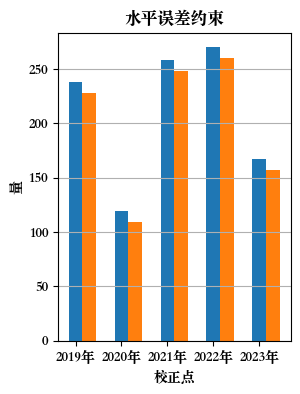

In [24]:
import random
import matplotlib.pyplot as plt
import numpy as np

x_data = ["20{}年".format(i) for i in range(19, 24)]
y_data = np.asarray([random.randint(100, 300) for i in range(5)])
print(y_data.shape)
y_data2 = y_data-10

fig = plt.figure(figsize=(3,4))
ax = fig.add_subplot(111)

x_width = range(0, len(x_data))
x_width2 = [i+0.3 for i in x_width]

# lw stands for line width, fc stands for fillment color
ax.bar(x_width, y_data, lw=0.5, width=0.3, label="允许最大水平误差")
ax.bar(x_width2, y_data2, lw=0.5, width=0.3, label="校正前实际水平误差")

ax.set_title("水平误差约束")
ax.set_xlabel("校正点")
ax.set_ylabel("量")
ax.set_xticks(range(0, 5), x_data)
ax.grid(True, axis='y')

plt.show()